<a href="https://colab.research.google.com/github/skj092/iNeuron/blob/main/Practical_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective : Image Classification with CIFAR 100

`This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are d500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are 
grouped into 20 superclasses. Each image comes with a "Fine" label (the class to which it belongs) and a "ccoarse" label (the super class to which it belongs).`

**[Link of the dataset](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)**

`Task : Create a Web Application using Flask. Use the end user should be able to upload an image and get result with the prediction score.`

In [1]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

--2021-06-05 07:26:22--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  92.3MB/s    in 1.8s    

2021-06-05 07:26:24 (92.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [2]:
! tar -xvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [24]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
import pickle
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
# Extracting image array from the pickle dictionary
testing1 = unpickle('cifar-10-batches-py/data_batch_1')[b'data']
testing2 = unpickle('cifar-10-batches-py/data_batch_2')[b'data']
testing3 = unpickle('cifar-10-batches-py/data_batch_3')[b'data']
testing4 = unpickle('cifar-10-batches-py/data_batch_4')[b'data']
testing5 = unpickle('cifar-10-batches-py/data_batch_5')[b'data']
testing5 = unpickle('cifar-10-batches-py/data_batch_5')[b'data']
test_batch= unpickle('cifar-10-batches-py/test_batch')[b'data']

In [7]:
# Converting array into dataframe
testing1 = pd.DataFrame(testing1)
testing2 = pd.DataFrame(testing2)
testing3 = pd.DataFrame(testing3)
testing4 = pd.DataFrame(testing4)
testing5 = pd.DataFrame(testing5)
test = pd.DataFrame(test_batch)

In [8]:
# Collecting all training and test dataset
train = pd.concat([testing1, testing2, testing3, testing4, testing5])
test = pd.DataFrame(test_batch)

In [9]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,...,39,30,11,0,57,94,34,34,116,94,87,67,68,76,72,70,79,82,86,92,94,92,84,90,93,91,83,77,69,55,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,...,20,77,58,52,73,96,120,131,120,122,133,125,32,12,19,70,122,107,99,91,62,30,20,21,42,48,28,11,11,12,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,...,77,67,68,76,78,73,75,82,105,98,94,88,87,86,86,89,91,92,88,89,86,85,91,94,95,94,92,90,86,78,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,...,77,70,68,68,66,53,49,55,56,53,53,61,61,59,61,44,40,49,53,56,58,57,62,74,62,58,55,67,54,66,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,188,183,182,184,184,180,177,177,177,176,175,175,173,170,169,168,166,163,163,162,158,157,168,172,171,166,171,174,177,179,...,77,77,75,73,79,83,78,78,78,79,76,75,82,84,84,89,87,92,93,97,96,98,99,101,102,102,101,102,99,97,92,88,85,82,83,79,78,82,78,80


To look at each image, we need to convert each 1D rows into 32x32x3 RGB tensor 

In [18]:
train.shape, test.shape

((50000, 3072), (10000, 3072))

In [20]:
img1 = np.array(train.iloc[0])
print(img1.shape)
print(type(img1))

(3072,)
<class 'numpy.ndarray'>


In [25]:
# converting 1D vector into 3D RGB tensor
img1 = img1.reshape(32, 32, 3)
print(img1.shape)
print(type(img1))

(32, 32, 3)
<class 'numpy.ndarray'>


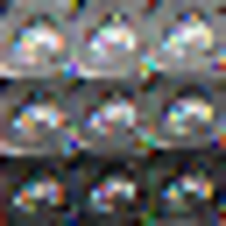

In [29]:
img = Image.fromarray(img1)
img.resize((226, 226))